In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from cenpy import products
import cenpy
import warnings
warnings.filterwarnings("ignore")
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
import os
from io import BytesIO
from zipfile import ZipFile
import requests

In [3]:
from keplergl import KeplerGl

In [4]:
pd.options.display.min_rows = 1000

In [5]:
conn = cenpy.products.APIConnection("ACSDT5Y2018")

In [161]:
data = conn.query(['B19013_001E'], 
                  geo_unit='zip code tabulation area')  

In [6]:
names = ['B19013_001E', 'B15012_001E']
data = conn.query(names, 
                  geo_unit='block group', 
                  geo_filter={"state": "36", "county": "047"})
for name in names:
    data[name] = data[name].astype(float)
data['geoid'] = data['state'] + data['county'] + data['tract'] + data['block group']
data.head()

,B19013_001E,B15012_001E,state,county,tract,block group,geoid
0,61450.0,545.0,36,047,021100,2,360470211002
1,63833.0,956.0,36,047,021700,2,360470217002
2,19979.0,136.0,36,047,025500,2,360470255002
3,41375.0,367.0,36,047,027100,2,360470271002
4,-666666666.0,0.0,36,047,028000,0,360470280000


In [7]:
data = data.replace(-666666666.0, np.nan)

In [8]:
print(data.shape)
data.head(1)

(2085, 7)


,B19013_001E,B15012_001E,state,county,tract,block group,geoid
0,61450.0,545.0,36,047,021100,2,360470211002


In [9]:
state = '36'
yr = '18'
url = 'https://www2.census.gov/geo/tiger/TIGER20%s/BG/tl_20%s_%s_bg.zip' % (yr, yr, state)
resp = requests.get(url).content

In [10]:
zipfiles = ZipFile(BytesIO(resp))

In [11]:
files = zipfiles.namelist()
_ = [zipfiles.extract(x, path='data/') for x in files]
shapefile = [x for x in files if x[-3:] == 'shp'][0]

In [12]:
gdf = gpd.read_file('data/' + shapefile)

In [13]:
gdf = gdf.merge(data, left_on='GEOID', right_on='geoid')

In [14]:
print(gdf.shape)
gdf.head(1)

(2085, 20)


,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,B19013_001E,B15012_001E,state,county,tract,block group,geoid
0,36,047,041000,1,360470410001,Block Group 1,G5030,S,80258,0,+40.6004081,-073.9744876,"POLYGON ((-73.97646 40.60136, -73.97554 40.601...",58313.0,156.0,36,047,041000,1,360470410001


In [134]:
# gdf.to_file("test.geojson", driver='GeoJSON')

<AxesSubplot:>

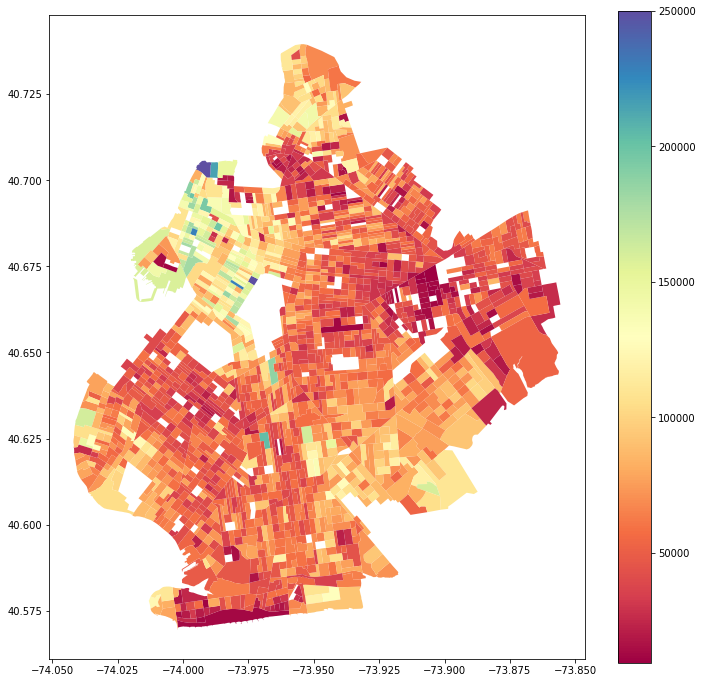

In [15]:
gdf.dropna().plot(column=names[0], cmap='Spectral', legend=True, figsize=(12,12))

<AxesSubplot:>

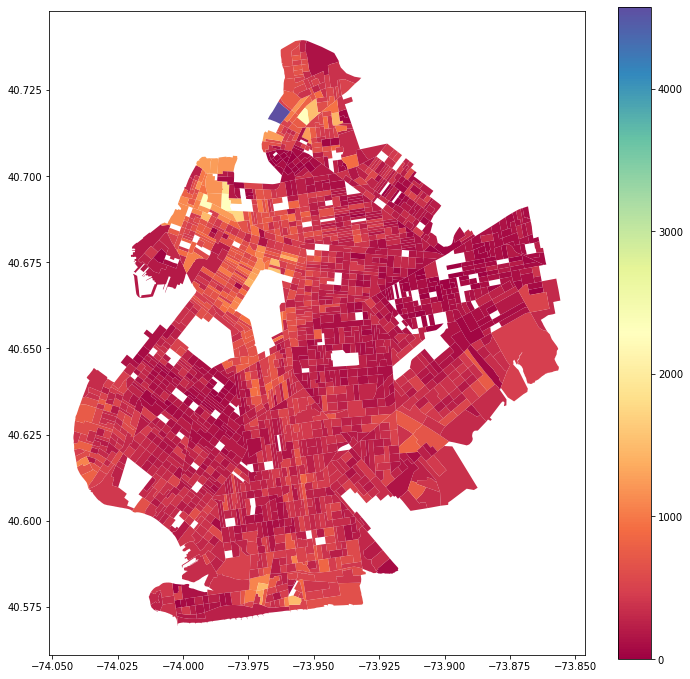

In [106]:
gdf.dropna().plot(column=names[1], cmap='Spectral', legend=True, figsize=(12,12))

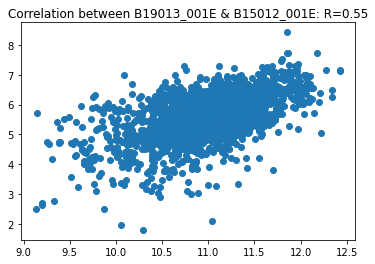

In [123]:
plt.scatter(np.log(data[names[0]]), np.log(data[names[1]]))
r = data[names[0]].corr(data[names[1]])
_ = plt.title('Correlation between %s & %s: R=%s' % (names[0], names[1], round(r, 2)))

<AxesSubplot:>

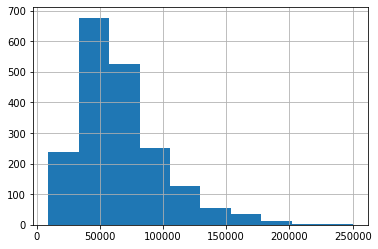

In [116]:
data[names[0]].hist()

In [16]:
#Create a basemap 
map = KeplerGl()
map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl()

In [17]:
map.add_data(data=gdf)

In [18]:
map.save_to_html(file_name='test1.html') 

Map saved to test1.html!
